In [28]:
import numpy as np
import pandas as pd
from datetime import date

from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import matplotlib.pyplot as plt
import seaborn as sns


In [151]:
df_iris = pd.read_csv('iris-data.csv')
df_iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [152]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [153]:
df_iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [154]:
df_iris.groupby('class').size()

class
Iris-setosa        49
Iris-setossa        1
Iris-versicolor    45
Iris-virginica     50
versicolor          5
dtype: int64

In [155]:
def rename_class(name):
    new_name = name
    if name == 'Iris-setossa':
        new_name = 'Iris-setosa'
    elif name == 'versicolor':
        new_name = 'Iris-versicolor'
    return new_name

In [156]:
# correct value of feature class
df_iris['class'] = df_iris.apply(lambda x: rename_class(x['class']), axis=1)
df_iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [157]:
# option 1: dropna
print(len(df_iris))
df_iris_new = df_iris.dropna()
print(len(df_iris_new))
df_iris_new.isnull().sum()

150
145


sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [158]:
# option 2: find similar rows to assign value
df_iris.loc[df_iris['class'] == 'Iris-setosa'].sort_values(by=['sepal_length_cm', 
                                                               'sepal_width_cm', 
                                                               'petal_length_cm'])

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
8,4.4,2.9,1.4,NaN,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa


In [159]:
df_iris.loc[df_iris['petal_width_cm'].isnull()]

# 5.0 3.4 1.5 NaN Iris-setosa -> 0.4
# 4.4 2.9 1.4 NaN Iris-setosa -> 0.2
# 4.9 3.1 1.5 NaN Iris-setosa -> 0.1
# 5.4 3.7 1.5 NaN Iris-setosa -> 0.4
# 4.8 3.4 1.6 NaN Iris-setosa -> 0.2

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [160]:
df_iris.iloc[[7], [3]] = 0.3
df_iris.iloc[[8], [3]] = 0.2
df_iris.iloc[[9], [3]] = 0.1
df_iris.iloc[[10], [3]] = 0.3
df_iris.iloc[[11], [3]] = 0.2
df_iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [161]:
df_iris.iloc[[7, 8, 9, 10, 11]]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.3,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.3,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa


In [162]:
df_iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.202667
std,1.312781,0.433123,1.764420,0.764651
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


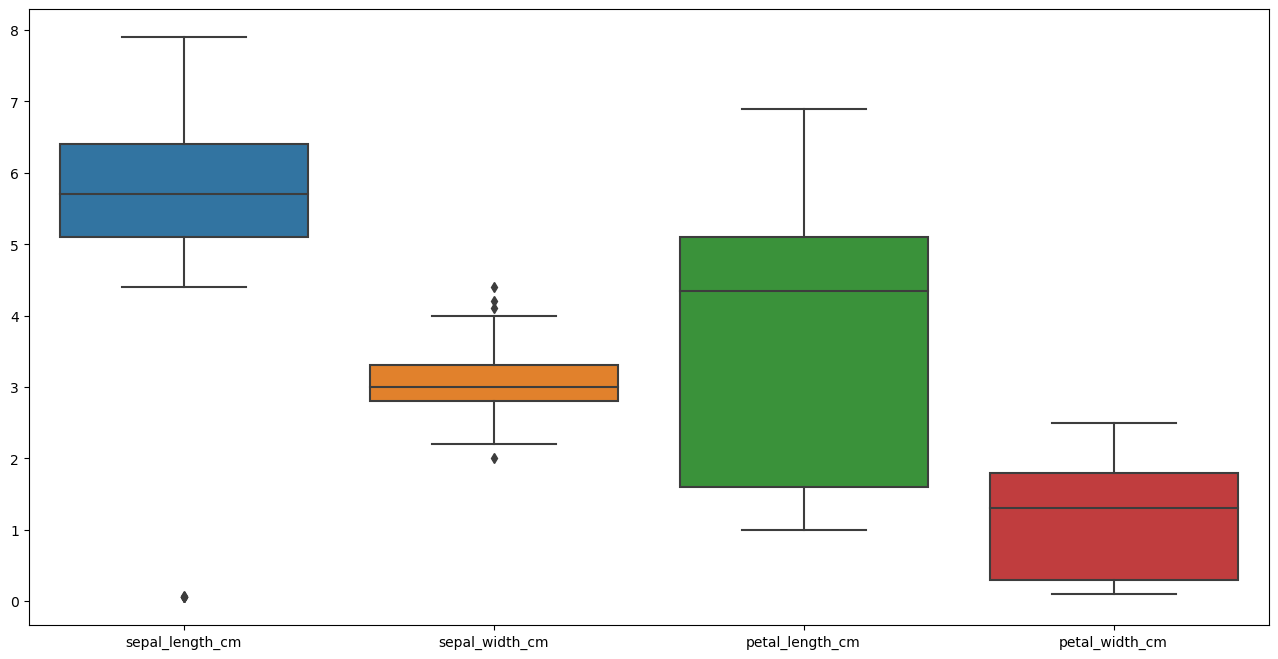

In [163]:
fig, ax = plt.subplots(figsize=(16,8))

ax = sns.boxplot(data=df_iris[['sepal_length_cm', 
                               'sepal_width_cm', 
                               'petal_length_cm', 
                               'petal_width_cm']])

plt.show()

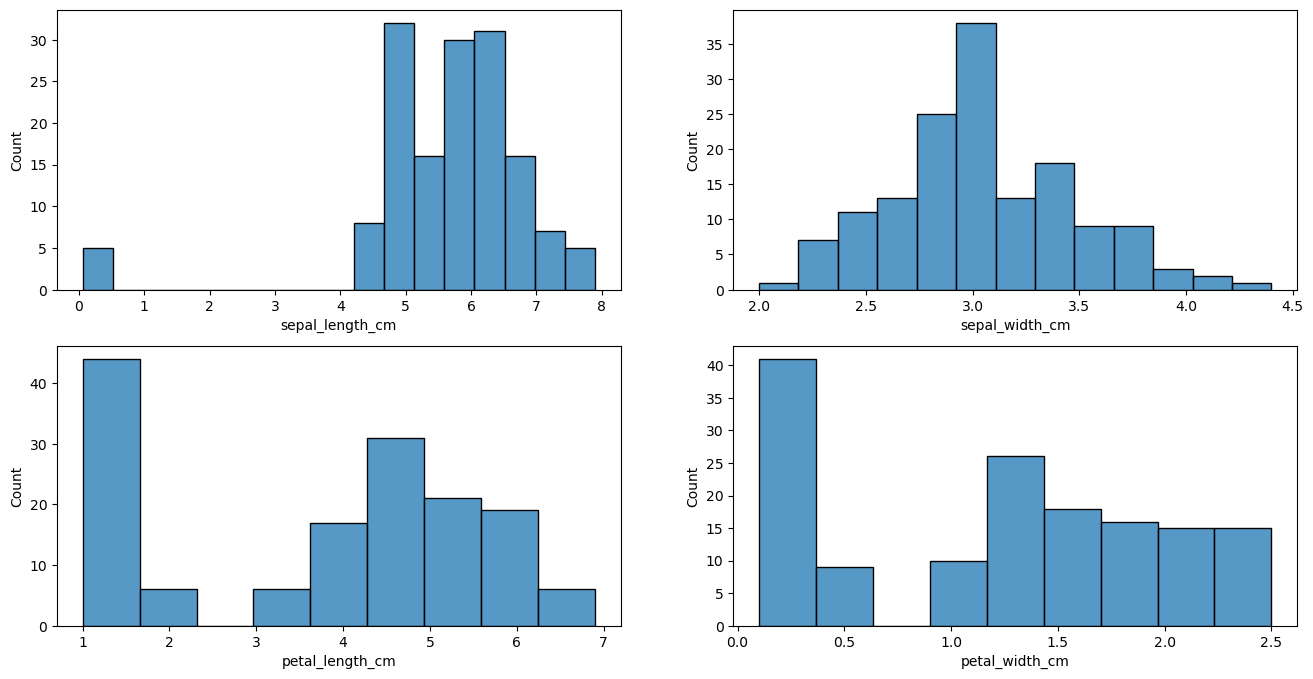

In [164]:
fig, axs = plt.subplots(ncols=2,
                        nrows=2,
                        figsize=(16,8))

plt.sca(axs[0,0])
sns.histplot(data=df_iris,
             x='sepal_length_cm')

plt.sca(axs[0,1])
sns.histplot(data=df_iris,
             x='sepal_width_cm')

plt.sca(axs[1,0])
sns.histplot(data=df_iris,
             x='petal_length_cm')

plt.sca(axs[1,1])
sns.histplot(data=df_iris,
             x='petal_width_cm')

plt.show()

In [165]:
# outliers sepal length
df_iris.loc[(df_iris['sepal_length_cm'] <= (5.1 - 1.5 * (6.4 - 5.1)))]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [166]:
df_iris.iloc[[77], [0]] = df_iris.iloc[[77], [0]] * 100
df_iris.iloc[[78], [0]] = df_iris.iloc[[78], [0]] * 100
df_iris.iloc[[79], [0]] = df_iris.iloc[[79], [0]] * 100
df_iris.iloc[[80], [0]] = df_iris.iloc[[80], [0]] * 100
df_iris.iloc[[81], [0]] = df_iris.iloc[[81], [0]] * 100

df_iris.iloc[[77, 78, 79, 80, 81]]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,6.7,3.0,5.0,1.7,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor


In [167]:
# outliers sepal width
df_iris.loc[(df_iris['sepal_width_cm'] <= (2.8 - 1.5 * (3.3 - 2.8))) |
            (df_iris['sepal_width_cm'] >= (3.3 + 1.5 * (3.3 - 2.8)))]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


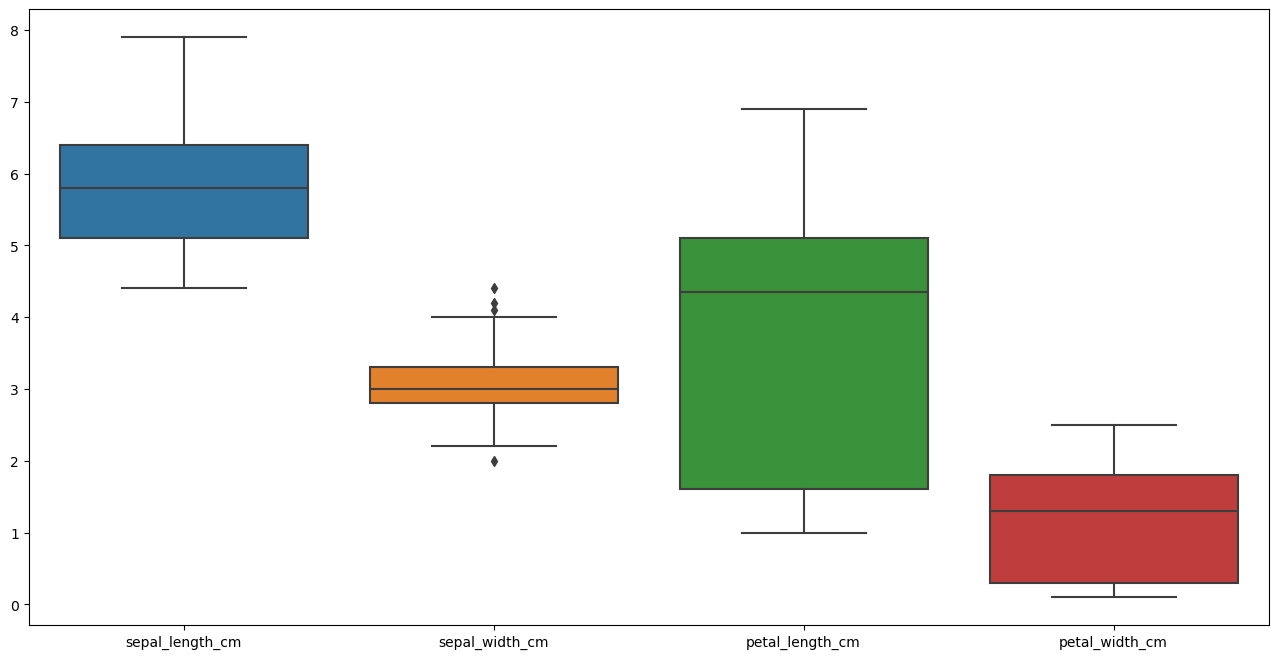

In [168]:
fig, ax = plt.subplots(figsize=(16,8))

ax = sns.boxplot(data=df_iris[['sepal_length_cm', 
                               'sepal_width_cm', 
                               'petal_length_cm', 
                               'petal_width_cm']])

plt.show()

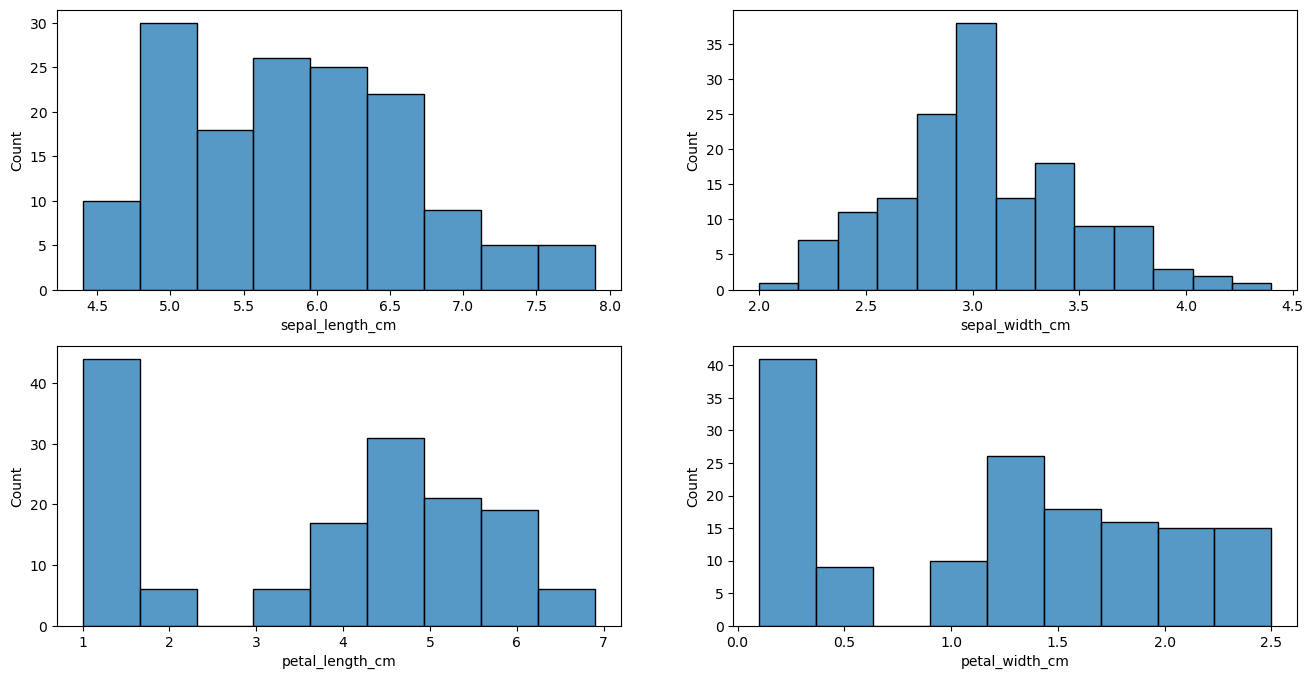

In [169]:
fig, axs = plt.subplots(ncols=2,
                        nrows=2,
                        figsize=(16,8))

plt.sca(axs[0,0])
sns.histplot(data=df_iris,
             x='sepal_length_cm')

plt.sca(axs[0,1])
sns.histplot(data=df_iris,
             x='sepal_width_cm')

plt.sca(axs[1,0])
sns.histplot(data=df_iris,
             x='petal_length_cm')

plt.sca(axs[1,1])
sns.histplot(data=df_iris,
             x='petal_width_cm')

plt.show()

In [170]:
df_iris.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.103578,0.850576,0.805836
sepal_width_cm,-0.103578,1.000000,-0.419796,-0.357912
petal_length_cm,0.850576,-0.419796,1.000000,0.961104
petal_width_cm,0.805836,-0.357912,0.961104,1.000000


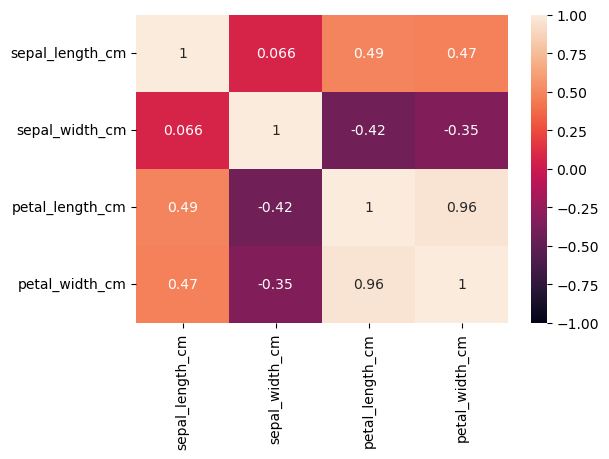

In [36]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(data=df_iris.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)

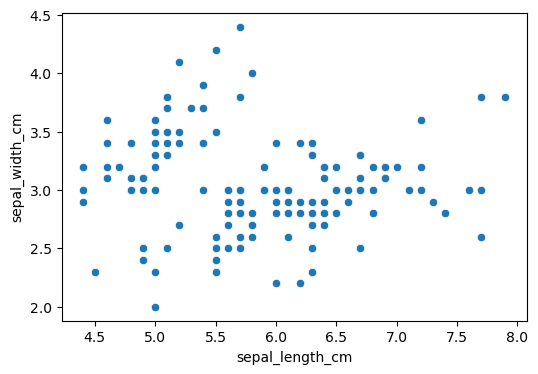

In [171]:
# no correlation (you can see outliers before clean)
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.scatterplot(data=df_iris, 
                     x='sepal_length_cm', 
                     y='sepal_width_cm')

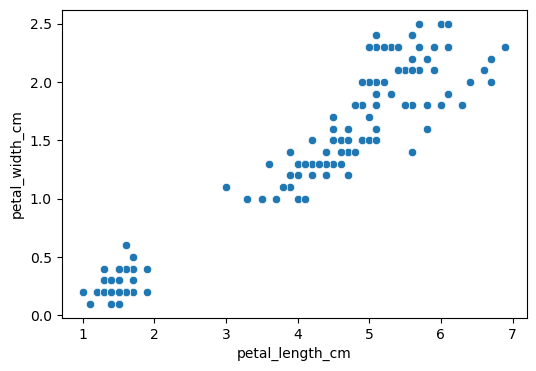

In [172]:
# high correlation
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.scatterplot(data=df_iris, 
                     x='petal_length_cm', 
                     y='petal_width_cm')

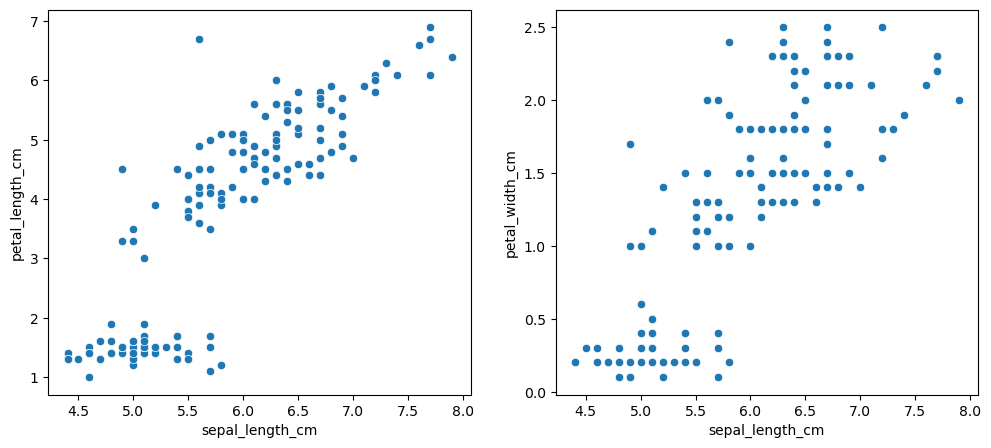

In [173]:
# medium correlation (you can see outliers before clean)
fig, axs = plt.subplots(ncols=2,
                        nrows=1,
                        figsize=(12,5))

plt.sca(axs[0])
sns.scatterplot(data=df_iris, 
                x='sepal_length_cm', 
                y='petal_length_cm')

plt.sca(axs[1])
sns.scatterplot(data=df_iris, 
                x='sepal_length_cm', 
                y='petal_width_cm')

plt.show()

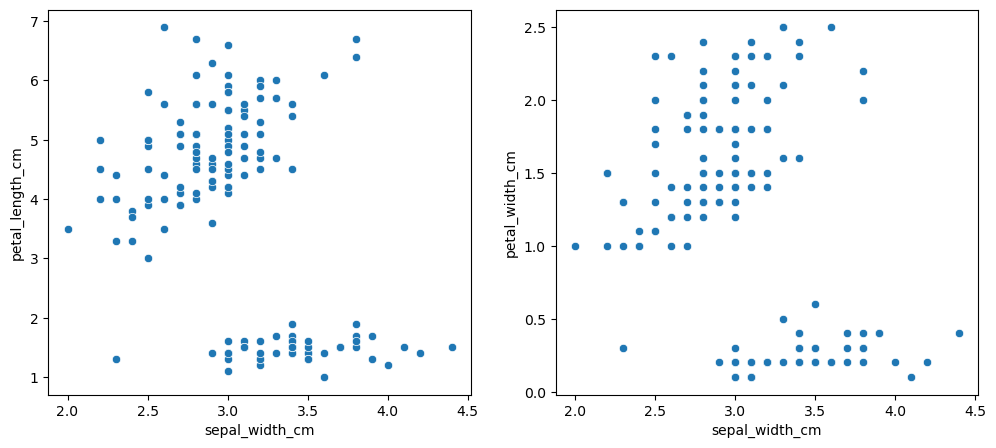

In [174]:
# no correlation
fig, axs = plt.subplots(ncols=2,
                        nrows=1,
                        figsize=(12,5))

plt.sca(axs[0])
sns.scatterplot(data=df_iris, 
                x='sepal_width_cm', 
                y='petal_length_cm')

plt.sca(axs[1])
sns.scatterplot(data=df_iris, 
                x='sepal_width_cm', 
                y='petal_width_cm')

plt.show()

In [175]:
# new features size
df_iris_size = df_iris.copy()
df_iris_size['sepal size'] = df_iris_size.apply(lambda x: x['sepal_length_cm'] * x['sepal_width_cm'], axis=1)
df_iris_size['petal size'] = df_iris_size.apply(lambda x: x['petal_length_cm'] * x['petal_width_cm'], axis=1)
df_iris_size

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,sepal size,petal size
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,20.10,11.96
146,6.3,2.5,5.0,2.3,Iris-virginica,15.75,11.50
147,6.5,3.0,5.2,2.0,Iris-virginica,19.50,10.40
148,6.2,3.4,5.4,2.3,Iris-virginica,21.08,12.42


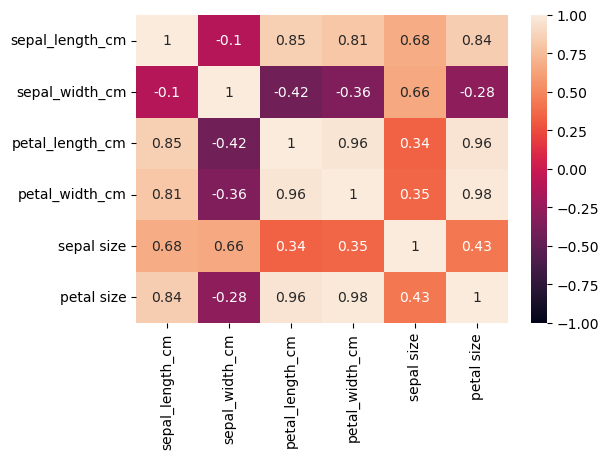

In [176]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(data=df_iris_size.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)

In [ ]:
df_iris.to_csv('my-iris-data.csv', index=False)

### Notes
- 150 records.
- Null values in petal_width_cm (5 rows). Necessary assign value or drop record.
- Feature class is categorical data. Some errors in values. Necessary assign right value.
- Data balance (feature class: the same number of records in every class).
- ¿Scalling? No significantly different.
- Outliers: big outliers in sepal length and some values in sepal width. ¿Correct/drop? Sepal length could be an error.
- Mean and median very similar in sepal size (outliers can be affect).
- Median higher than mean in petal size. More low values.
- Sepal width and sepal length, no correlation.
- Petal width and petal length, high correlation. Petal width largest, petal length largest too.
- Sepal length, medium correlation with petal width and length. Sepal length largest, petal length and width largest too.
- New size features, no additional value.